# Weather in Australia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Plot with missing data

In [2]:
df = pd.read_csv('weatherAUS.csv')

# EDA

## Business goal

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Analyzing this data table, we can presume that our business goal is to determine whether it will rain tomorrow. Our response variable will be the data from the "RainTomorrow" column, while the explanatory variables will be the remaining columns. Response: Rain Tomorrow -gbfjdbfjsdbfhdsbf
Explanatory: Data: fghfdrsjkbdfjd
location: jhd sdnfh
.
.
.
.
.
.


## Data analysis and vizualization

Numerical and categorical values

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
categorical= df.select_dtypes(include=['object']).columns
print("Categorical: ", list(categorical))

numerical = df.select_dtypes(include=['number']).columns
print("Numerical: ", list(numerical))

Categorical:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Stats

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Stats vizualization

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

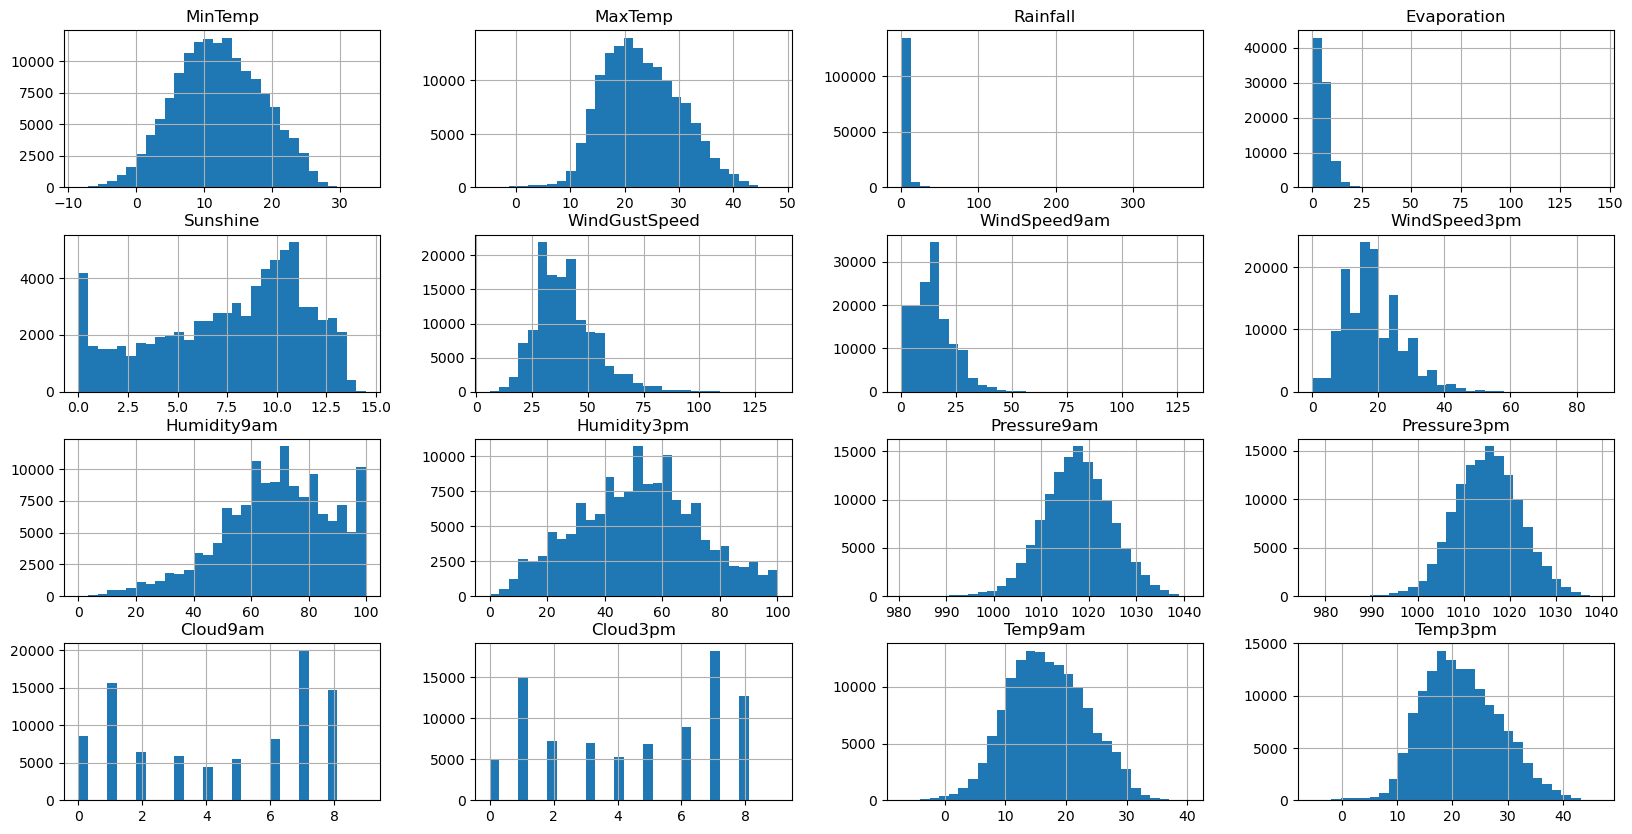

In [7]:
df.hist(figsize=(20, 10), bins=30)  

We want to identify the correlation with missing values and later again without them.

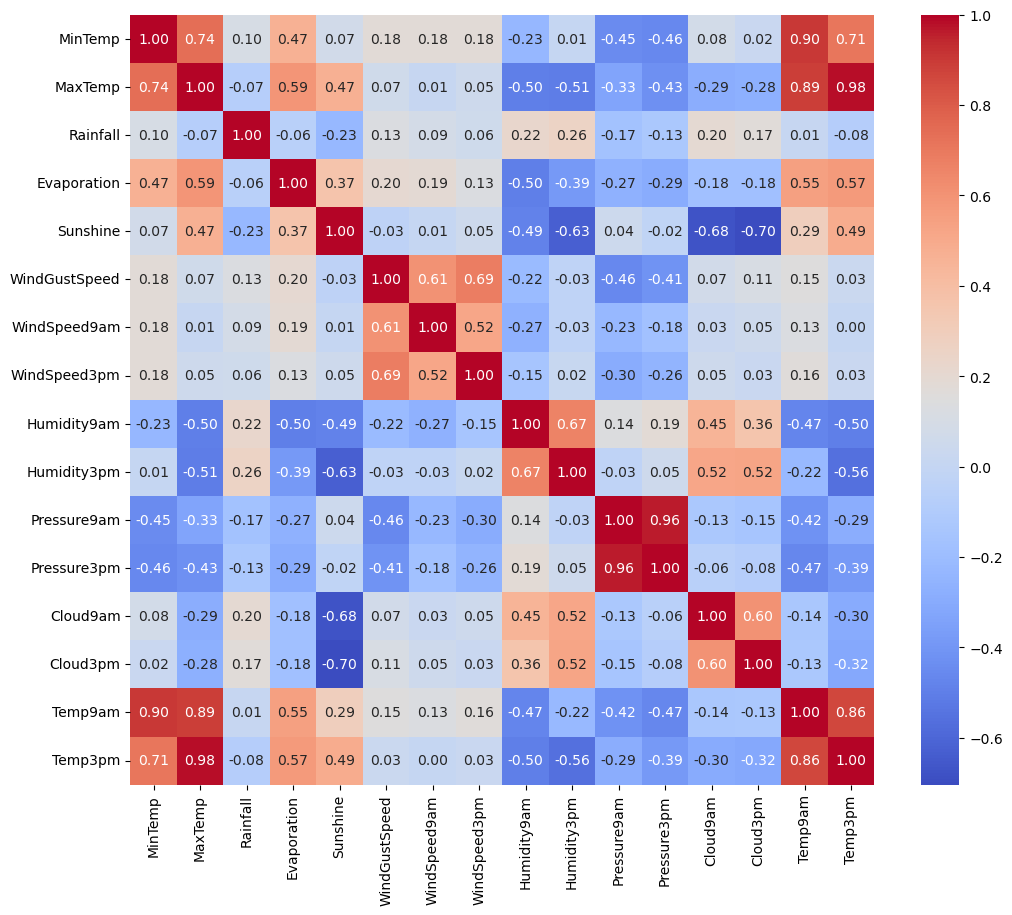

In [8]:
nan_numerical_df = df.select_dtypes(include=['number'])
nan_correlation_matrix = nan_numerical_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(nan_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

## Missing Values and Anomalies

### Missing Values

Handling missing values - RainTomorrow an RainToday. Those are binary values and it is hard to replace them with other values.

In [9]:
df.dropna(axis=0, subset=['RainToday','RainTomorrow'], inplace=True) 

How many missing values do we have?

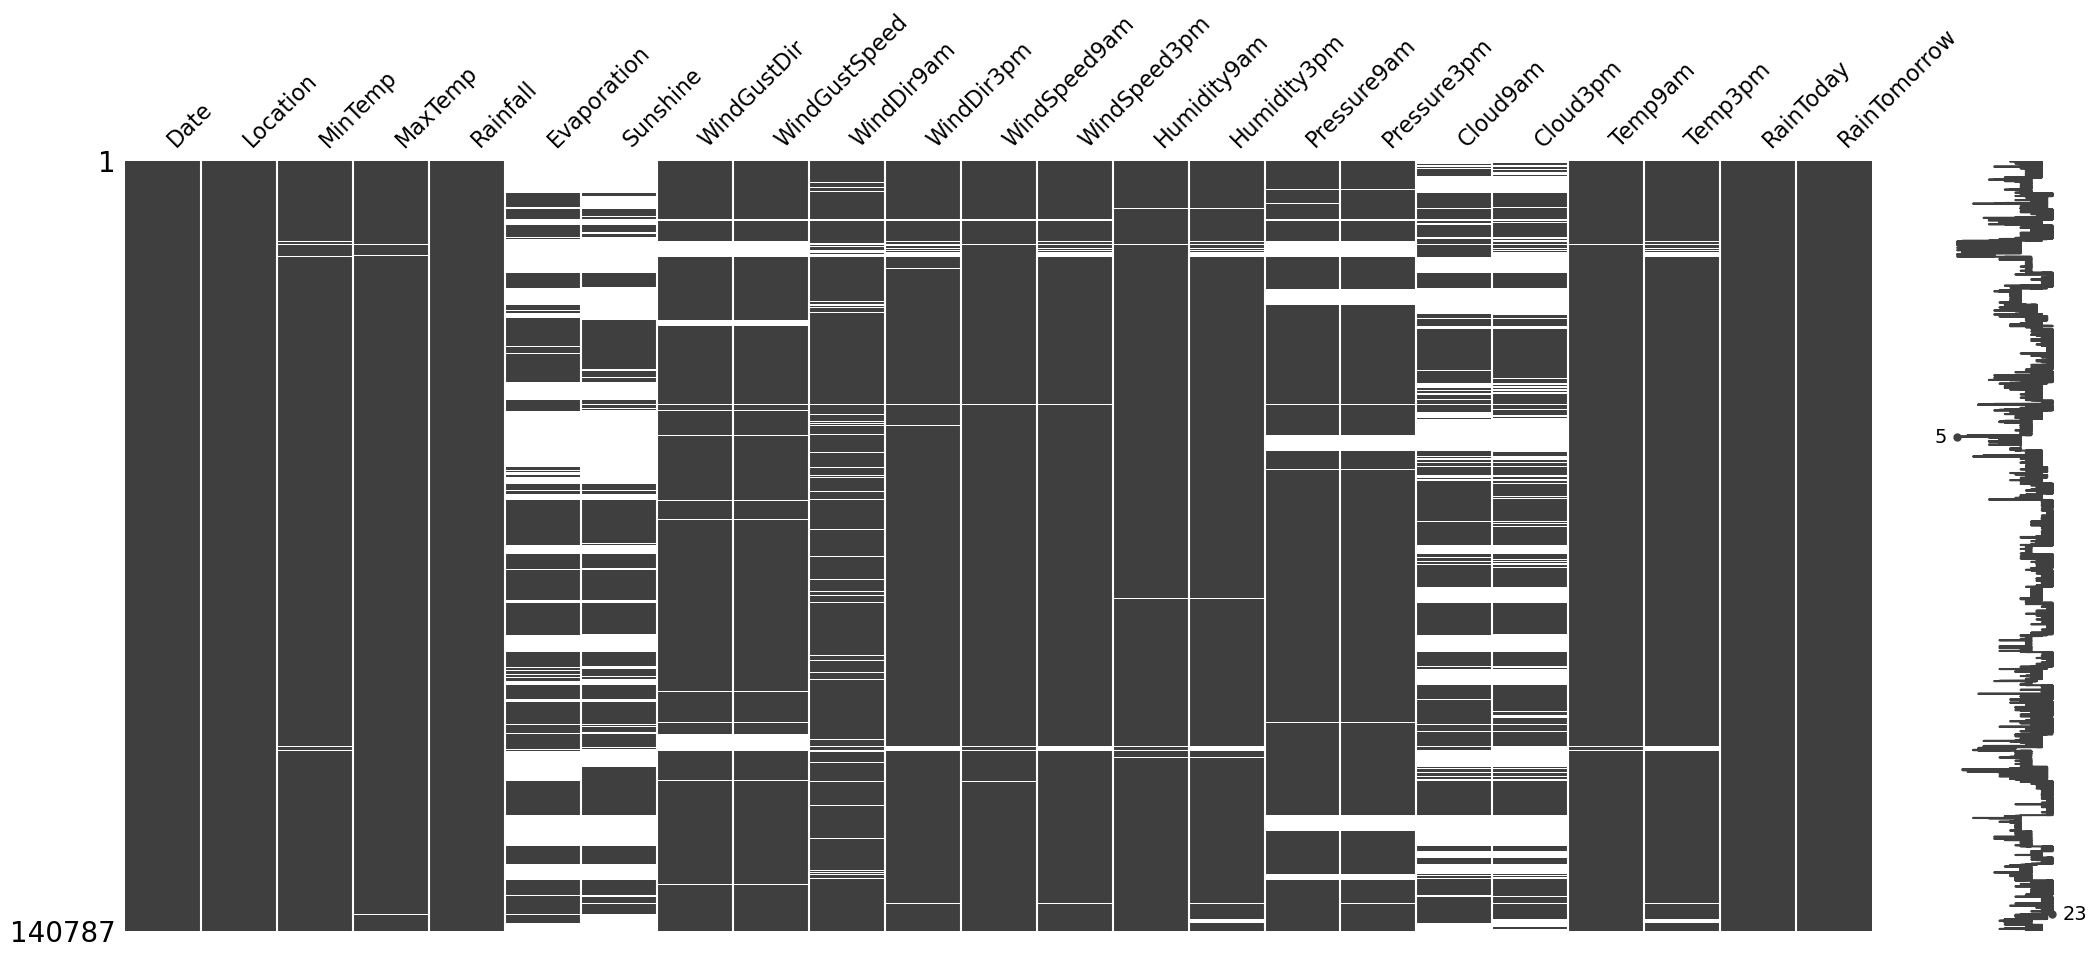

In [10]:
# Plot shows missing values
msno.matrix(df)
plt.show()

In [11]:
#Function for making stats about missing values
def missing(dataframe):
    total = dataframe.isnull().sum()
    percent = round(dataframe.isnull().sum()/len(df)*100, 2)
    missing = pd.concat([percent,total], axis=1, keys=['Percent','Total']).sort_values(by = ['Percent'], ascending = False).T
    return missing

Stats about missng values

In [12]:
missing(df)

,Sunshine,Evaporation,Cloud3pm,Cloud9am,Pressure3pm,Pressure9am,WindDir9am,WindGustDir,WindGustSpeed,WindDir3pm,...,Humidity9am,WindSpeed9am,Temp9am,MinTemp,MaxTemp,RainToday,Date,Location,Rainfall,RainTomorrow
Percent,47.45,42.4,39.84,37.38,9.78,9.76,6.86,6.51,6.47,2.61,...,1.08,0.75,0.47,0.33,0.22,0.0,0.0,0.0,0.0,0.0
Total,66805.00,59694.0,56094.00,52625.00,13769.00,13743.00,9660.00,9163.00,9105.00,3670.00,...,1517.00,1055.00,656.00,468.00,307.00,0.0,0.0,0.0,0.0,0.0


Adding new column with a month for better dealing with missing values

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12


### Handling missing categorical values

In [14]:
df_with_missing = df.copy()

In [15]:
df_with_missing.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [18]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')


In [18]:
# Handling categorical missing values ('WindGustDir', 'WindDir9am', 'WindDir3pm'). We want to replace them in each location with mode.
modes = df[categorical[2:5]].apply(pd.Series.mode).to_dict("list")
modes = {i:modes[i][0] for i in modes}

df_cat = df[categorical].dropna()
loc_cat = df_cat.groupby(['Location'])[categorical[2:5]].agg(pd.Series.mode)
del df_cat
print(loc_cat.shape[0], df.Location.nunique())
loc_cat.T
# We can see two Locations missing, taht means they contain only NaN values in at least one column.

47 49


Location,Adelaide,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
WindGustDir,WSW,W,ESE,E,N,SSE,E,SE,NW,SW,...,ENE,NW,E,ENE,SE,N,WNW,SSE,NE,SSE
WindDir9am,NNE,SE,ESE,SW,N,SSE,SW,SSE,NNW,NE,...,SE,NW,E,E,NW,ENE,WNW,SE,SW,SE
WindDir3pm,WSW,W,ESE,"[E, NNE]",N,N,ENE,SE,WNW,SW,...,ENE,NW,E,WSW,SSE,SSW,SE,SSE,NE,SSW


In [21]:
missing_locations = list(set(df.Location.unique().tolist()) - set(loc_cat.index.tolist()))
print(missing_locations)
# We will replace NaN in those locations with mode values for whole data frame (counted higher), where there is a need.

['Newcastle', 'Albany']


In [22]:
for loc in missing_locations:
    x = df[df['Location'] == loc][categorical[2:5]].apply(pd.Series.mode)
    x.fillna(modes, inplace = True)
    x.index = [loc]
    loc_cat = pd.concat([loc_cat, x], axis = 0)
loc_cat.T

,Adelaide,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,Newcastle,Albany
WindGustDir,WSW,W,ESE,E,N,SSE,E,SE,NW,SW,...,E,ENE,SE,N,WNW,SSE,NE,SSE,W,W
WindDir9am,NNE,SE,ESE,SW,N,SSE,SW,SSE,NNW,NE,...,E,E,NW,ENE,WNW,SE,SW,SE,NW,NW
WindDir3pm,WSW,W,ESE,"[E, NNE]",N,N,ENE,SE,WNW,SW,...,E,WSW,SSE,SSW,SE,SSE,NE,SSW,SE,ESE


In [23]:
# Now we have proper dimensions
loc_cat.shape

(49, 3)

In [24]:
for l in df.Location.unique():  
    if l not in loc_cat.index:
        continue  

    indices = df[df['Location'] == l].index
    for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        value = loc_cat.loc[l, col]
        
        if isinstance(value, (np.ndarray, list)) and len(value) > 0:
            value = value[0]  
        
        if not isinstance(value, (str, int, float)):
            value = np.nan  
        
        df.loc[indices, col] = df.loc[indices, col].fillna(value)
        loc_cat.loc[l, col] = value  

### Handling missing numerical values

There are many missing numerical values 

In [25]:
df.isnull().sum().sum()

284494

In [26]:
# Average value for each (Location, Month) combination
loc_month_num = df.groupby(['Location', 'Month'])[df.columns[df.isnull().any()]].mean()

# Average for a given month (regardless of location)
month_num = df.groupby('Month')[df.columns[df.isnull().any()]].mean()



In [27]:
for l in df.Location.unique():
    for m in df.Month.unique():
        indices = df[(df['Location'] == l) & (df['Month'] == m)].index
        available_nan = df.columns[df.isnull().any()]  

        for col in available_nan:
            try:
                # Retrieve the average for (Location, Month)
                value = loc_month_num.loc[(l, m), col]

                # If no data is available for the given location → use the average from other cities for the given month
                if pd.isna(value):
                    value = month_num.loc[m, col]  # Retrieve the average for the month (all cities)

                # If the value is a list, take the first element
                if pd.api.types.is_list_like(value):
                    value = value[0] if len(value) > 0 else np.nan  

                # Fill in missing values
                df.loc[indices, col] = df.loc[indices, col].fillna(value)

            except KeyError:
                continue

In [29]:
# There are no NaN hurayyyyy!!!
df.isnull().sum().sum()

0

Let's check if our method is correct.

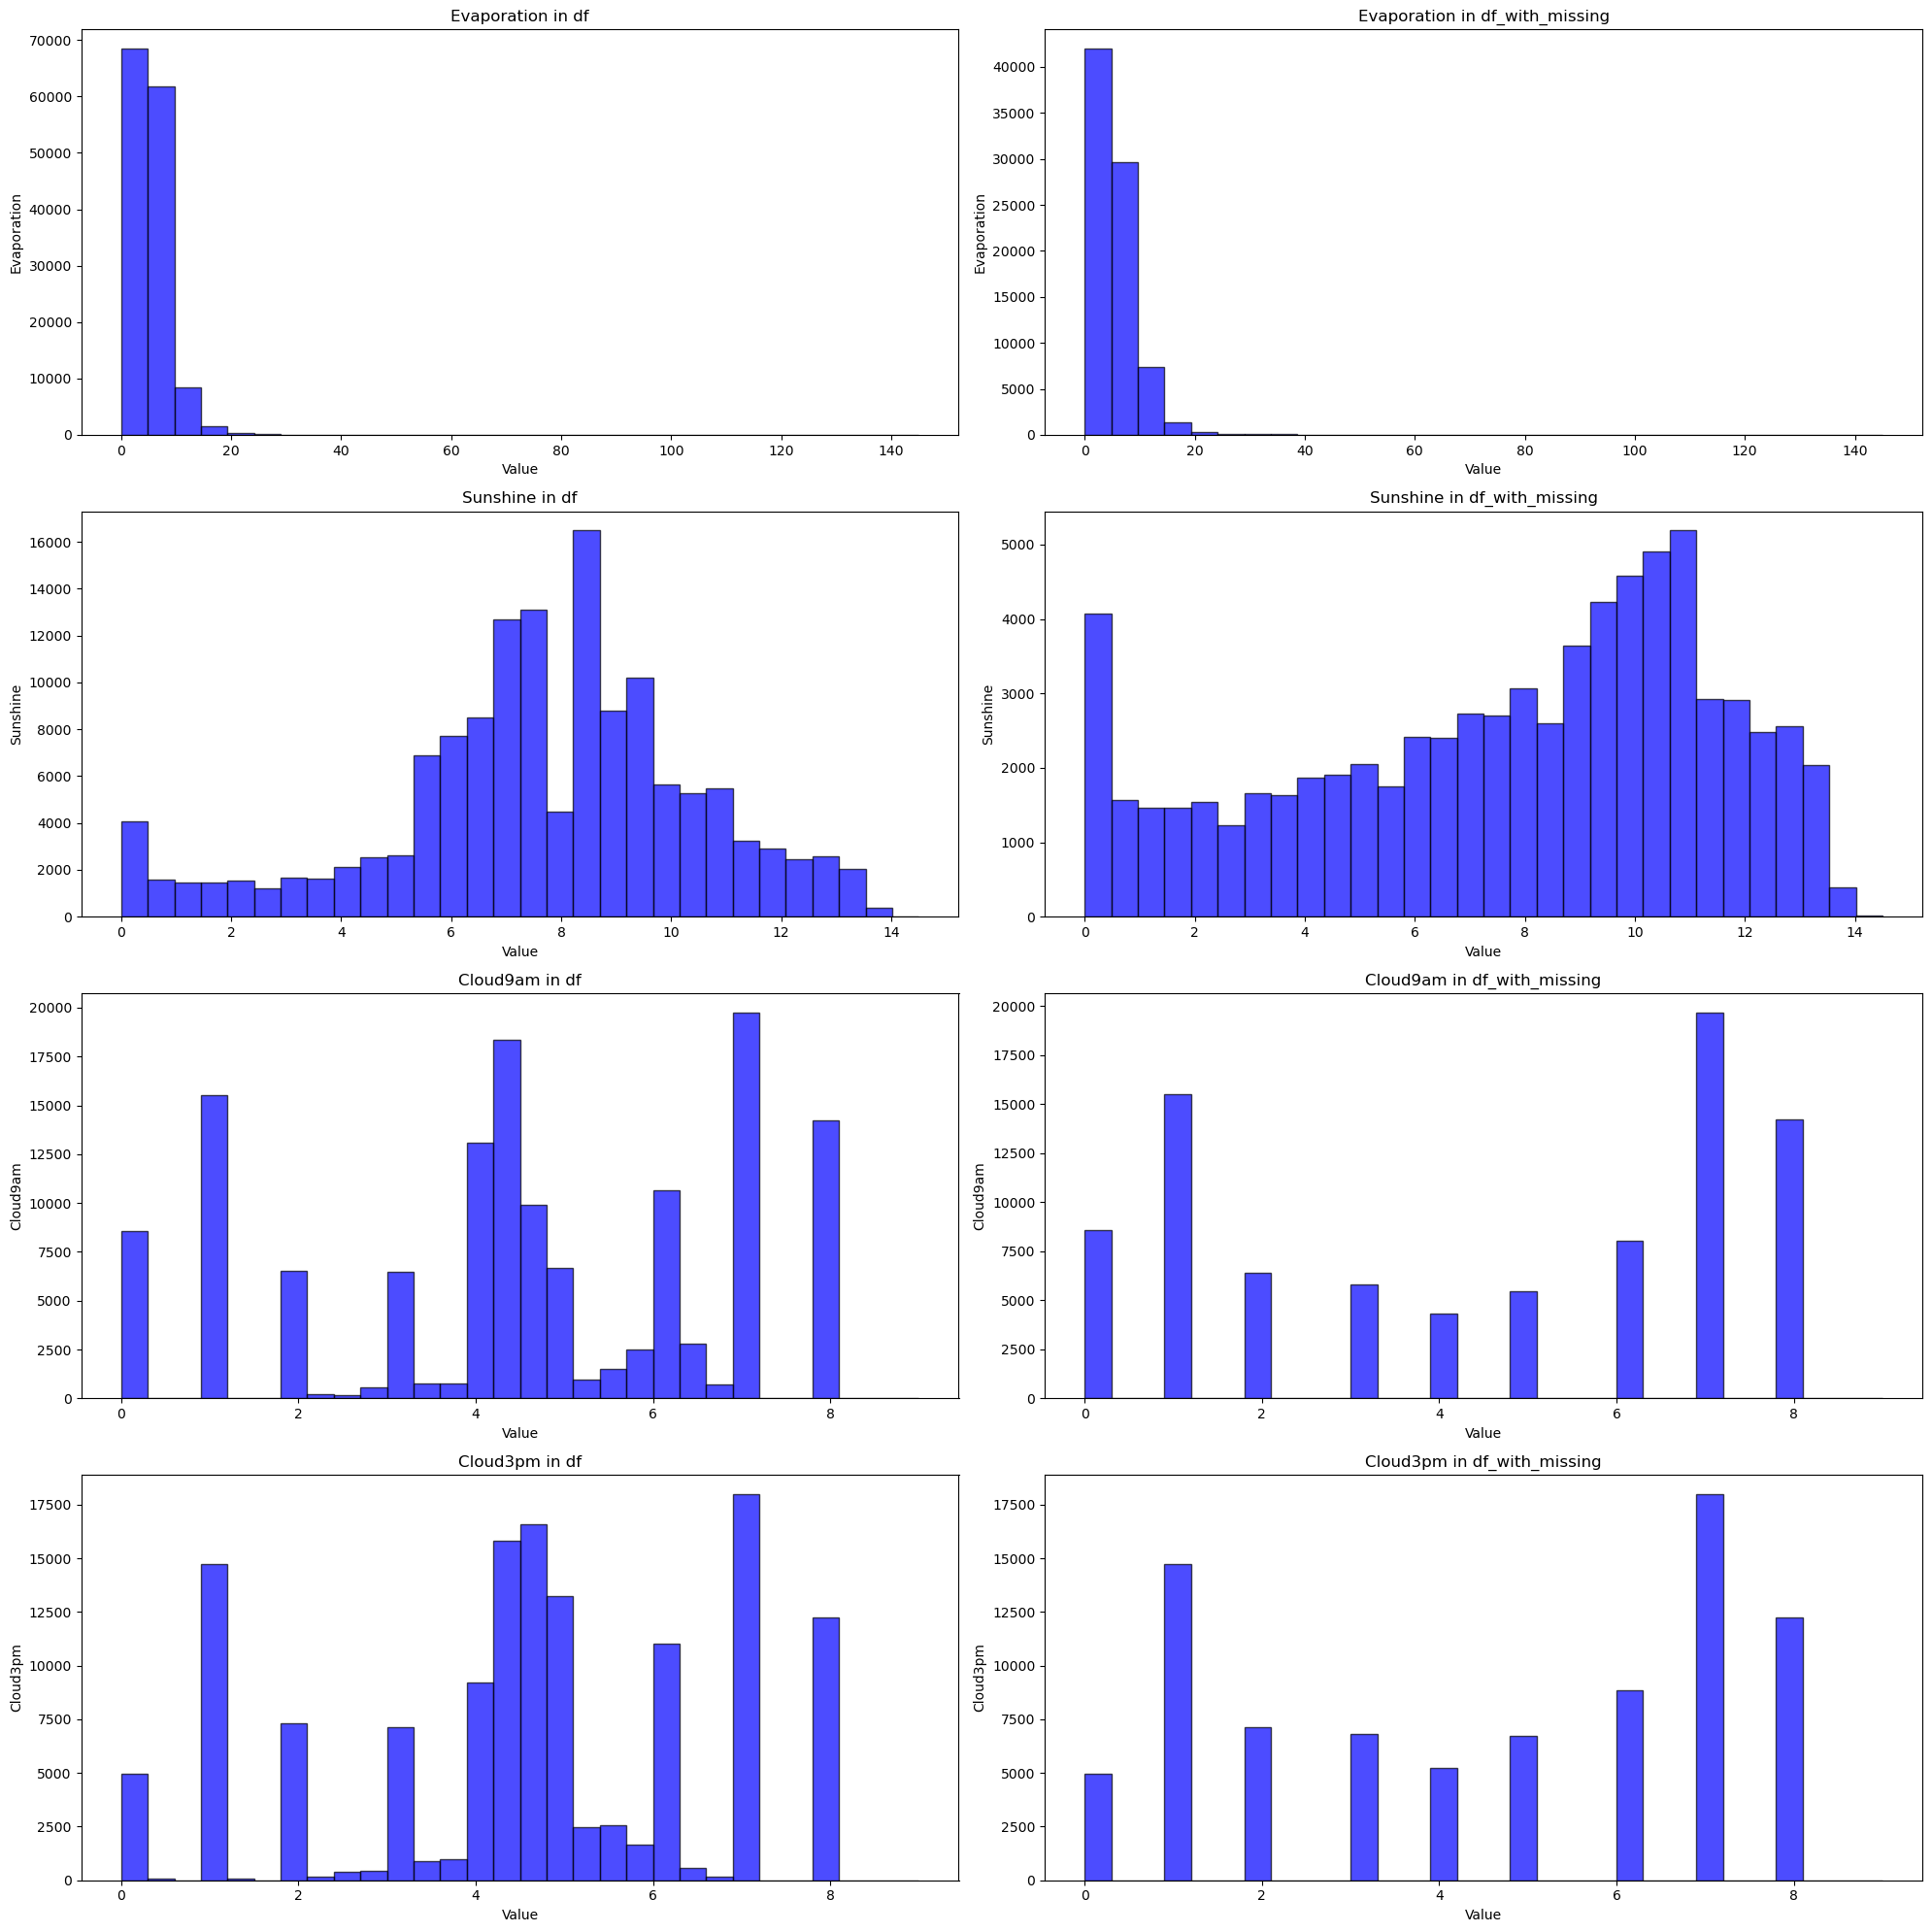

In [30]:
nan_columns = ['Evaporation','Evaporation', 'Sunshine', 'Sunshine','Cloud9am', 'Cloud9am','Cloud3pm', 'Cloud3pm']

n_rows = 4
n_cols = 2

dfs = [df, df_with_missing]
df_names = ['df', 'df_with_missing']  

plt.figure(figsize=(20, 20))

for i, column in enumerate(nan_columns):
    current_df = dfs[i % 2]  
    current_df_name = df_names[i % 2] 
    plt.subplot(n_rows, n_cols, i + 1)  
    plt.hist(current_df[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'{column} in {current_df_name}')
    plt.xlabel('Value')
    plt.ylabel(column)

plt.tight_layout()
plt.show() 

### Test KNNImputer

In [53]:
df2 = df_with_missing.copy()

df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [57]:
df2 = df_with_missing.copy()

from sklearn.impute import KNNImputer

# Assuming df_with_missing is your original DataFrame
df2 = df_with_missing.copy()

# df2 = df2.head(30000)
df2 = df2.iloc[40000:70000]

# Select only numerical columns
# numerical_cols = [col for col in df2.select_dtypes(include=['float64', 'int64']).columns 
#                           if df2[col].isnull().any() and col not in ['Sunshine', 'Evaporation']]

numerical_cols = [col for col in df2.select_dtypes(include=['float64', 'int64']).columns 
                           if df2[col].isnull().any()]

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Impute missing values in all numerical columns
imputed_data = imputer.fit_transform(df2[numerical_cols])

# Convert imputed data into a DataFrame with appropriate column names
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols, index=df2.index)

# imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols)

# Replace imputed columns in the original DataFrame
df2[numerical_cols] = imputed_df

# Check the result
print(df2.head(100))

            Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
41551 2014-10-04  Williamtown     11.5     27.4       0.0          5.8   
41552 2014-10-05  Williamtown     12.1     32.9       0.0         10.6   
41553 2014-10-06  Williamtown     15.5     26.7       0.0         24.6   
41554 2014-10-07  Williamtown     19.3     32.6       0.0          7.2   
41555 2014-10-08  Williamtown     14.6     19.1       0.4          5.6   
...          ...          ...      ...      ...       ...          ...   
41688 2015-02-18  Williamtown     17.2     29.3       0.0          8.0   
41693 2015-02-23  Williamtown     20.0     27.5      11.8         12.0   
41694 2015-02-24  Williamtown     19.6     27.9       0.0          6.4   
41695 2015-02-25  Williamtown     19.5     27.0       0.0          5.6   
41696 2015-02-26  Williamtown     19.3     26.2       0.0          4.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
41551   9.066667          NE        

In [58]:
#print(df2[numerical_cols].isnull().sum())
df2


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
41551,2014-10-04,Williamtown,11.5,27.4,0.0,5.8,9.066667,NE,33.0,NNE,...,34.0,1020.0,1015.4,8.0,3.666667,20.5,27.0,No,No,10
41552,2014-10-05,Williamtown,12.1,32.9,0.0,10.6,12.566667,WNW,44.0,WNW,...,10.0,1017.6,1014.1,1.0,0.333333,18.9,32.1,No,No,10
41553,2014-10-06,Williamtown,15.5,26.7,0.0,24.6,8.500000,SSW,46.0,SW,...,58.0,1019.6,1013.4,3.0,1.000000,20.1,24.6,No,No,10
41554,2014-10-07,Williamtown,19.3,32.6,0.0,7.2,7.200000,SSE,56.0,NW,...,53.0,1009.1,1009.0,7.0,3.000000,25.2,23.7,No,No,10
41555,2014-10-08,Williamtown,14.6,19.1,0.4,5.6,2.100000,S,46.0,S,...,93.0,1017.9,1018.4,7.0,7.000000,16.7,15.7,No,Yes,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73103,2016-08-31,Mildura,10.2,19.3,6.6,0.2,5.600000,W,37.0,W,...,53.0,1018.1,1017.1,0.0,7.000000,13.4,18.1,Yes,No,8
73104,2016-09-01,Mildura,11.7,19.5,0.0,2.4,3.800000,N,24.0,NaN,...,43.0,1018.8,1013.7,7.0,8.000000,13.2,18.7,No,No,9
73105,2016-09-02,Mildura,9.4,16.9,0.0,2.0,2.400000,SE,31.0,SSE,...,58.0,1010.2,1005.6,7.0,8.000000,10.5,16.3,No,No,9
73106,2016-09-03,Mildura,6.5,18.8,0.0,1.6,3.700000,W,56.0,W,...,47.0,1013.6,1013.1,6.0,8.000000,10.9,18.6,No,No,9


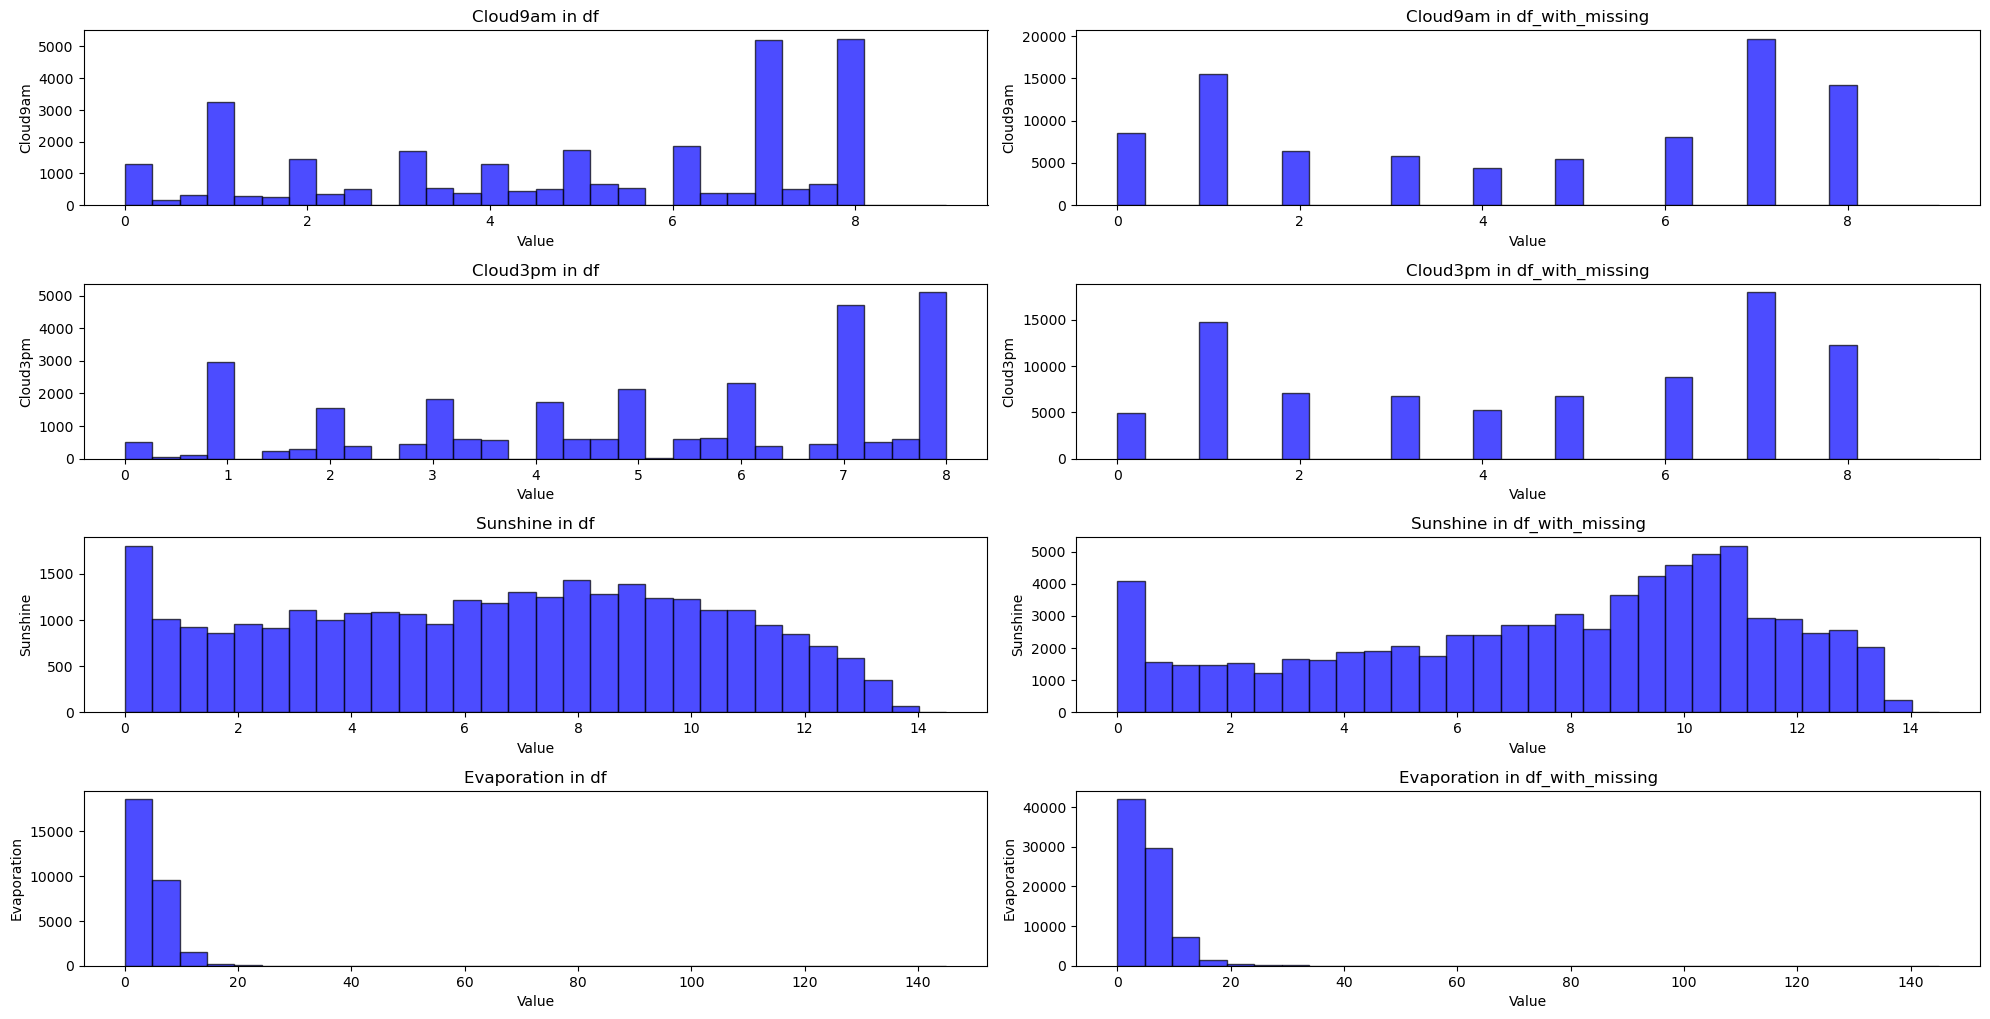

In [60]:
nan_columns = ['Cloud9am', 'Cloud9am','Cloud3pm', 'Cloud3pm','Sunshine', 'Sunshine', 'Evaporation', 'Evaporation']

n_rows = 8
n_cols = 2

dfs2 = [df2, df_with_missing]
df_names = ['df', 'df_with_missing']  

plt.figure(figsize=(20, 20))

for i, column in enumerate(nan_columns):
    current_df = dfs2[i % 2]  
    current_df_name = df_names[i % 2] 
    plt.subplot(n_rows, n_cols, i + 1)  
    plt.hist(current_df[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'{column} in {current_df_name}')
    plt.xlabel('Value')
    plt.ylabel(column)

plt.tight_layout()
plt.show() 

### Dependencies between variables

We want to identify where the boxplots show significant differences - potentially have a stronger influence on the rain the next day. Thanks to them, we can see that the weather conditions definitely have an impact on the next day's rain.
We can see that larger differences occur in humidity, pressure, and temperature during later hours, which will be important later.

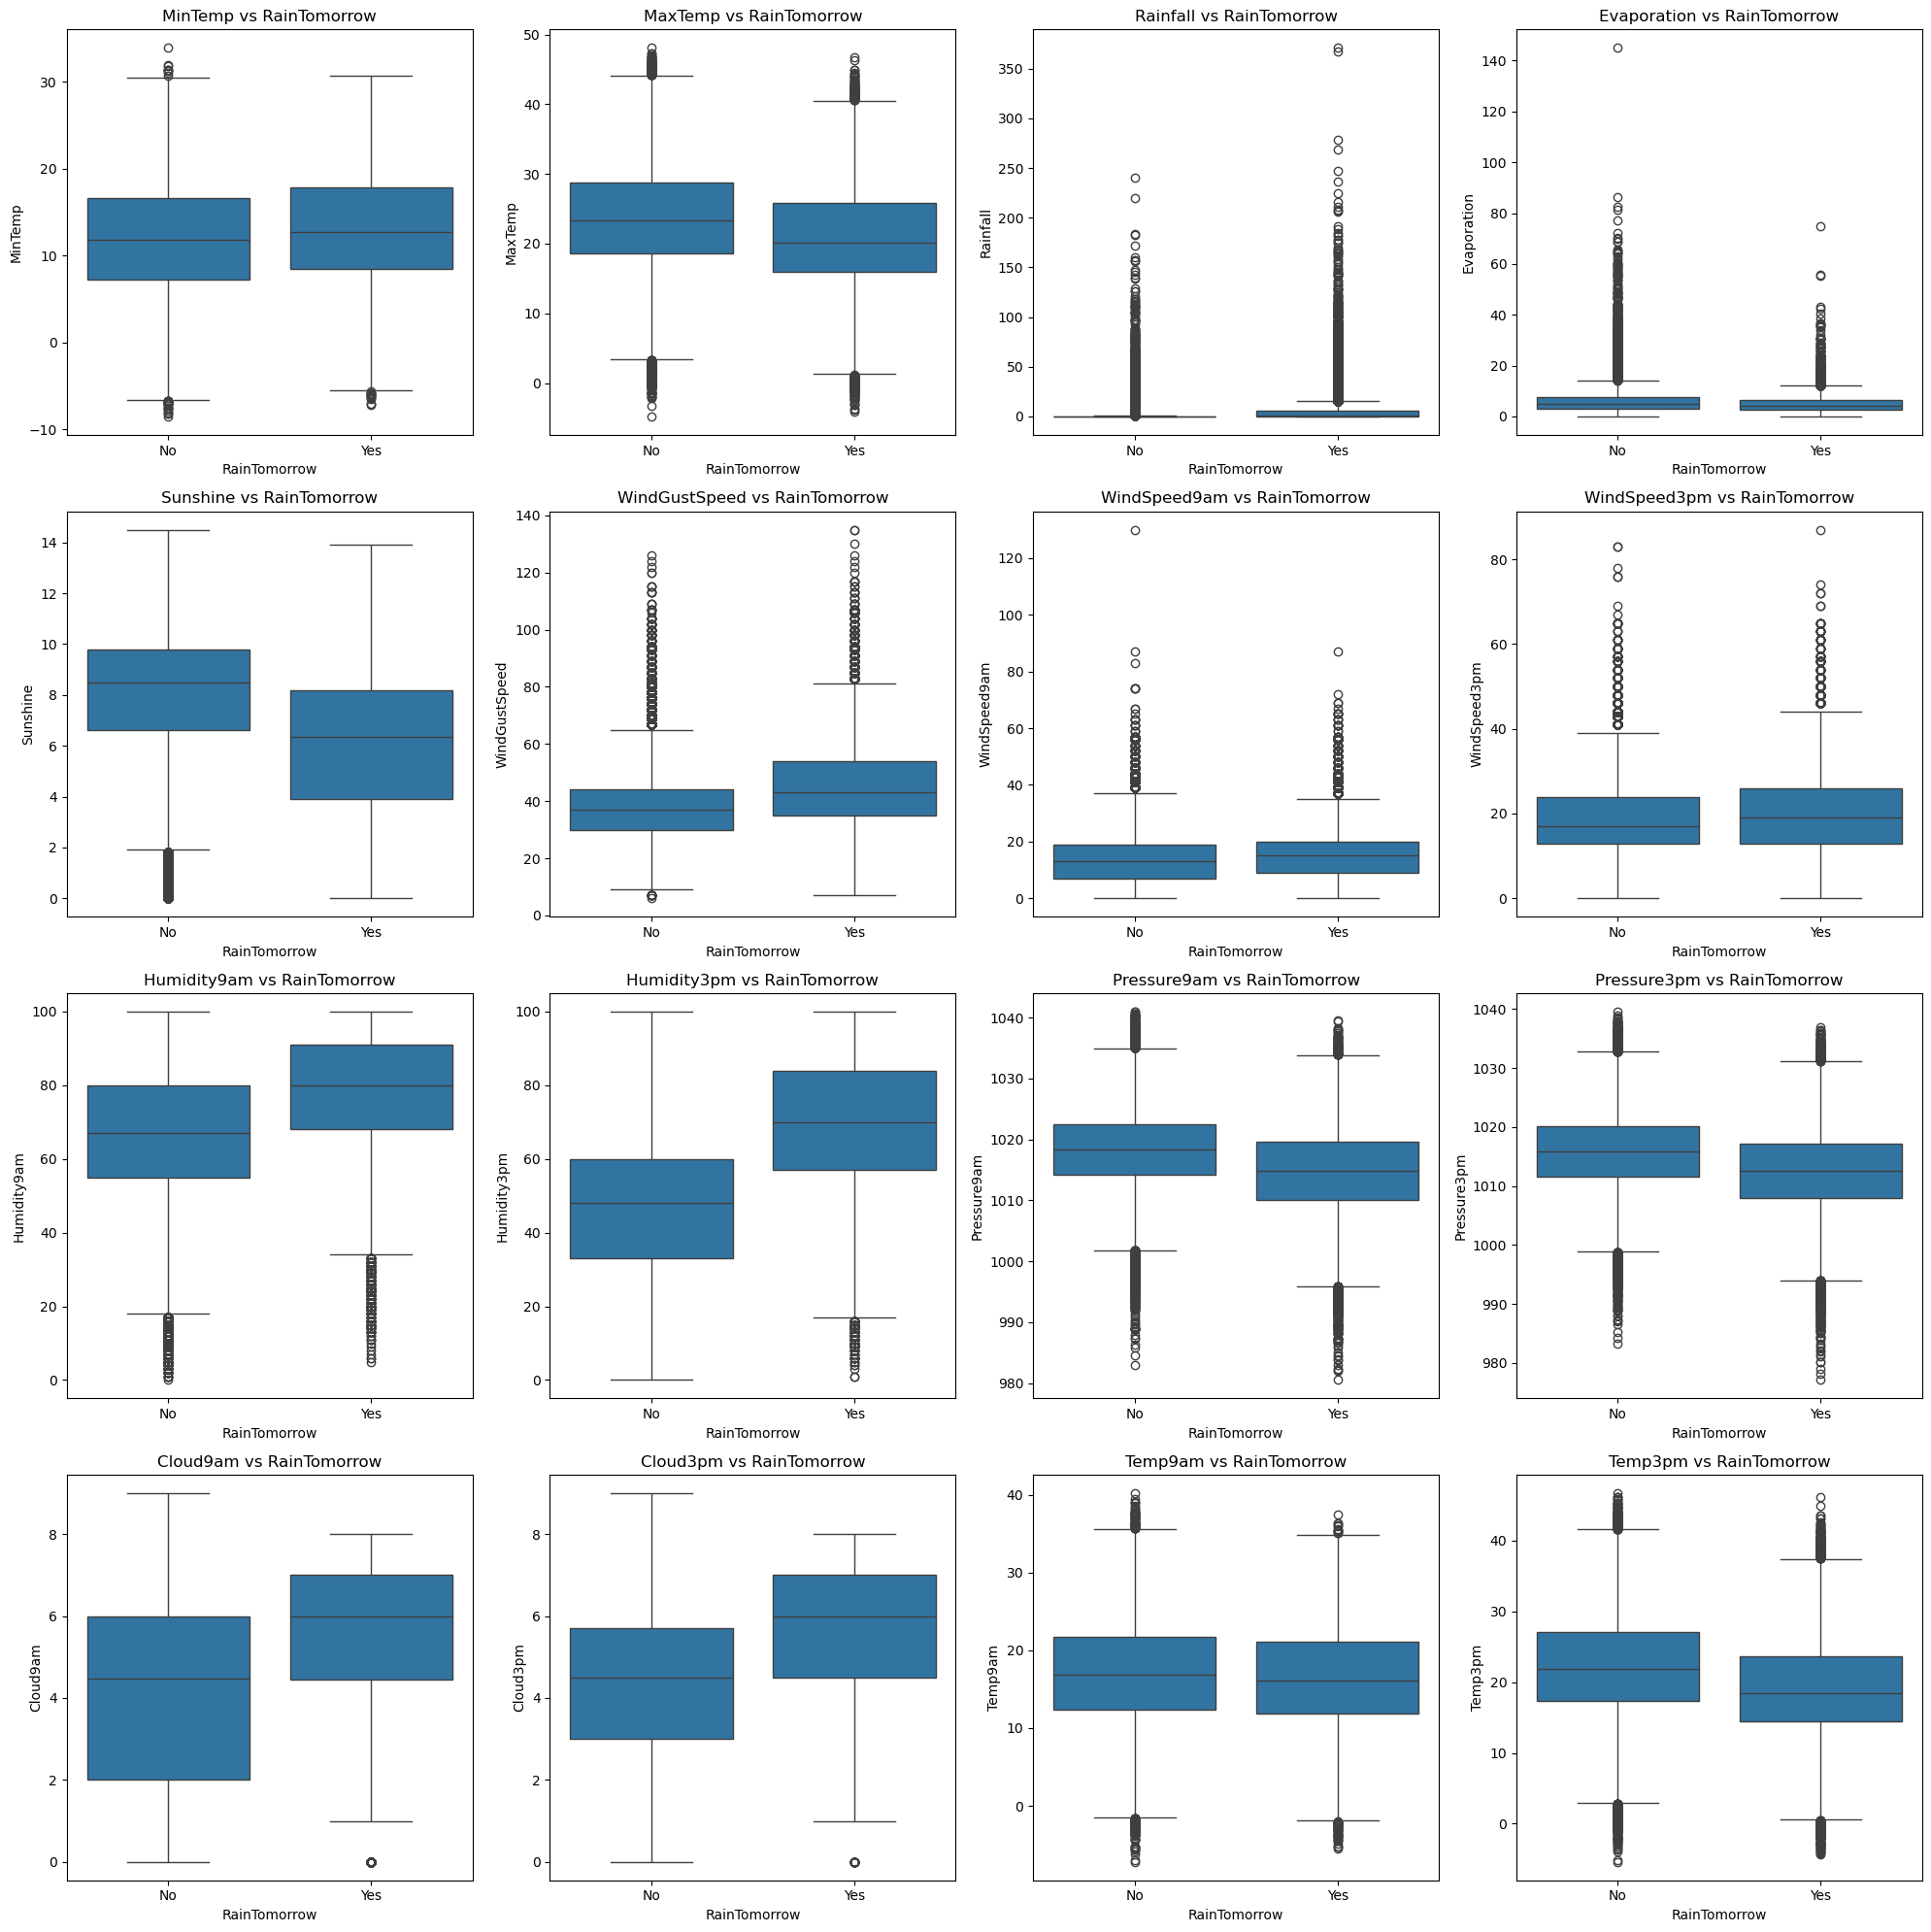

In [34]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                     'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
n_rows = 4
n_cols = 4

plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)  
    sns.boxplot(x='RainTomorrow', y=column, data=df)
    plt.title(f'{column} vs RainTomorrow')
    plt.xlabel('RainTomorrow')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Outliers

From previous plots we can see that there are many outliers, we decide to logarithm some of them them in order reduce their influence.

In [39]:
df['Rainfall'] = np.log1p(df['Rainfall'])  
df['Evaporation'] = np.log1p(df['Evaporation'])
df['WindGustSpeed'] = np.log1p(df['WindGustSpeed'])
df['WindSpeed9am'] = np.log1p(df['Rainfall'])  
df['WindSpeed3pm'] = np.log1p(df['Evaporation'])


For other columns we decide to relace outliers that ar over 3σ with 3σ. 

In [40]:
sigma_numerical = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

def replace_outliers(df, num_cols, threshold=3):
    for col in num_cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

df = replace_outliers(df, sigma_numerical)

We want to check what change.

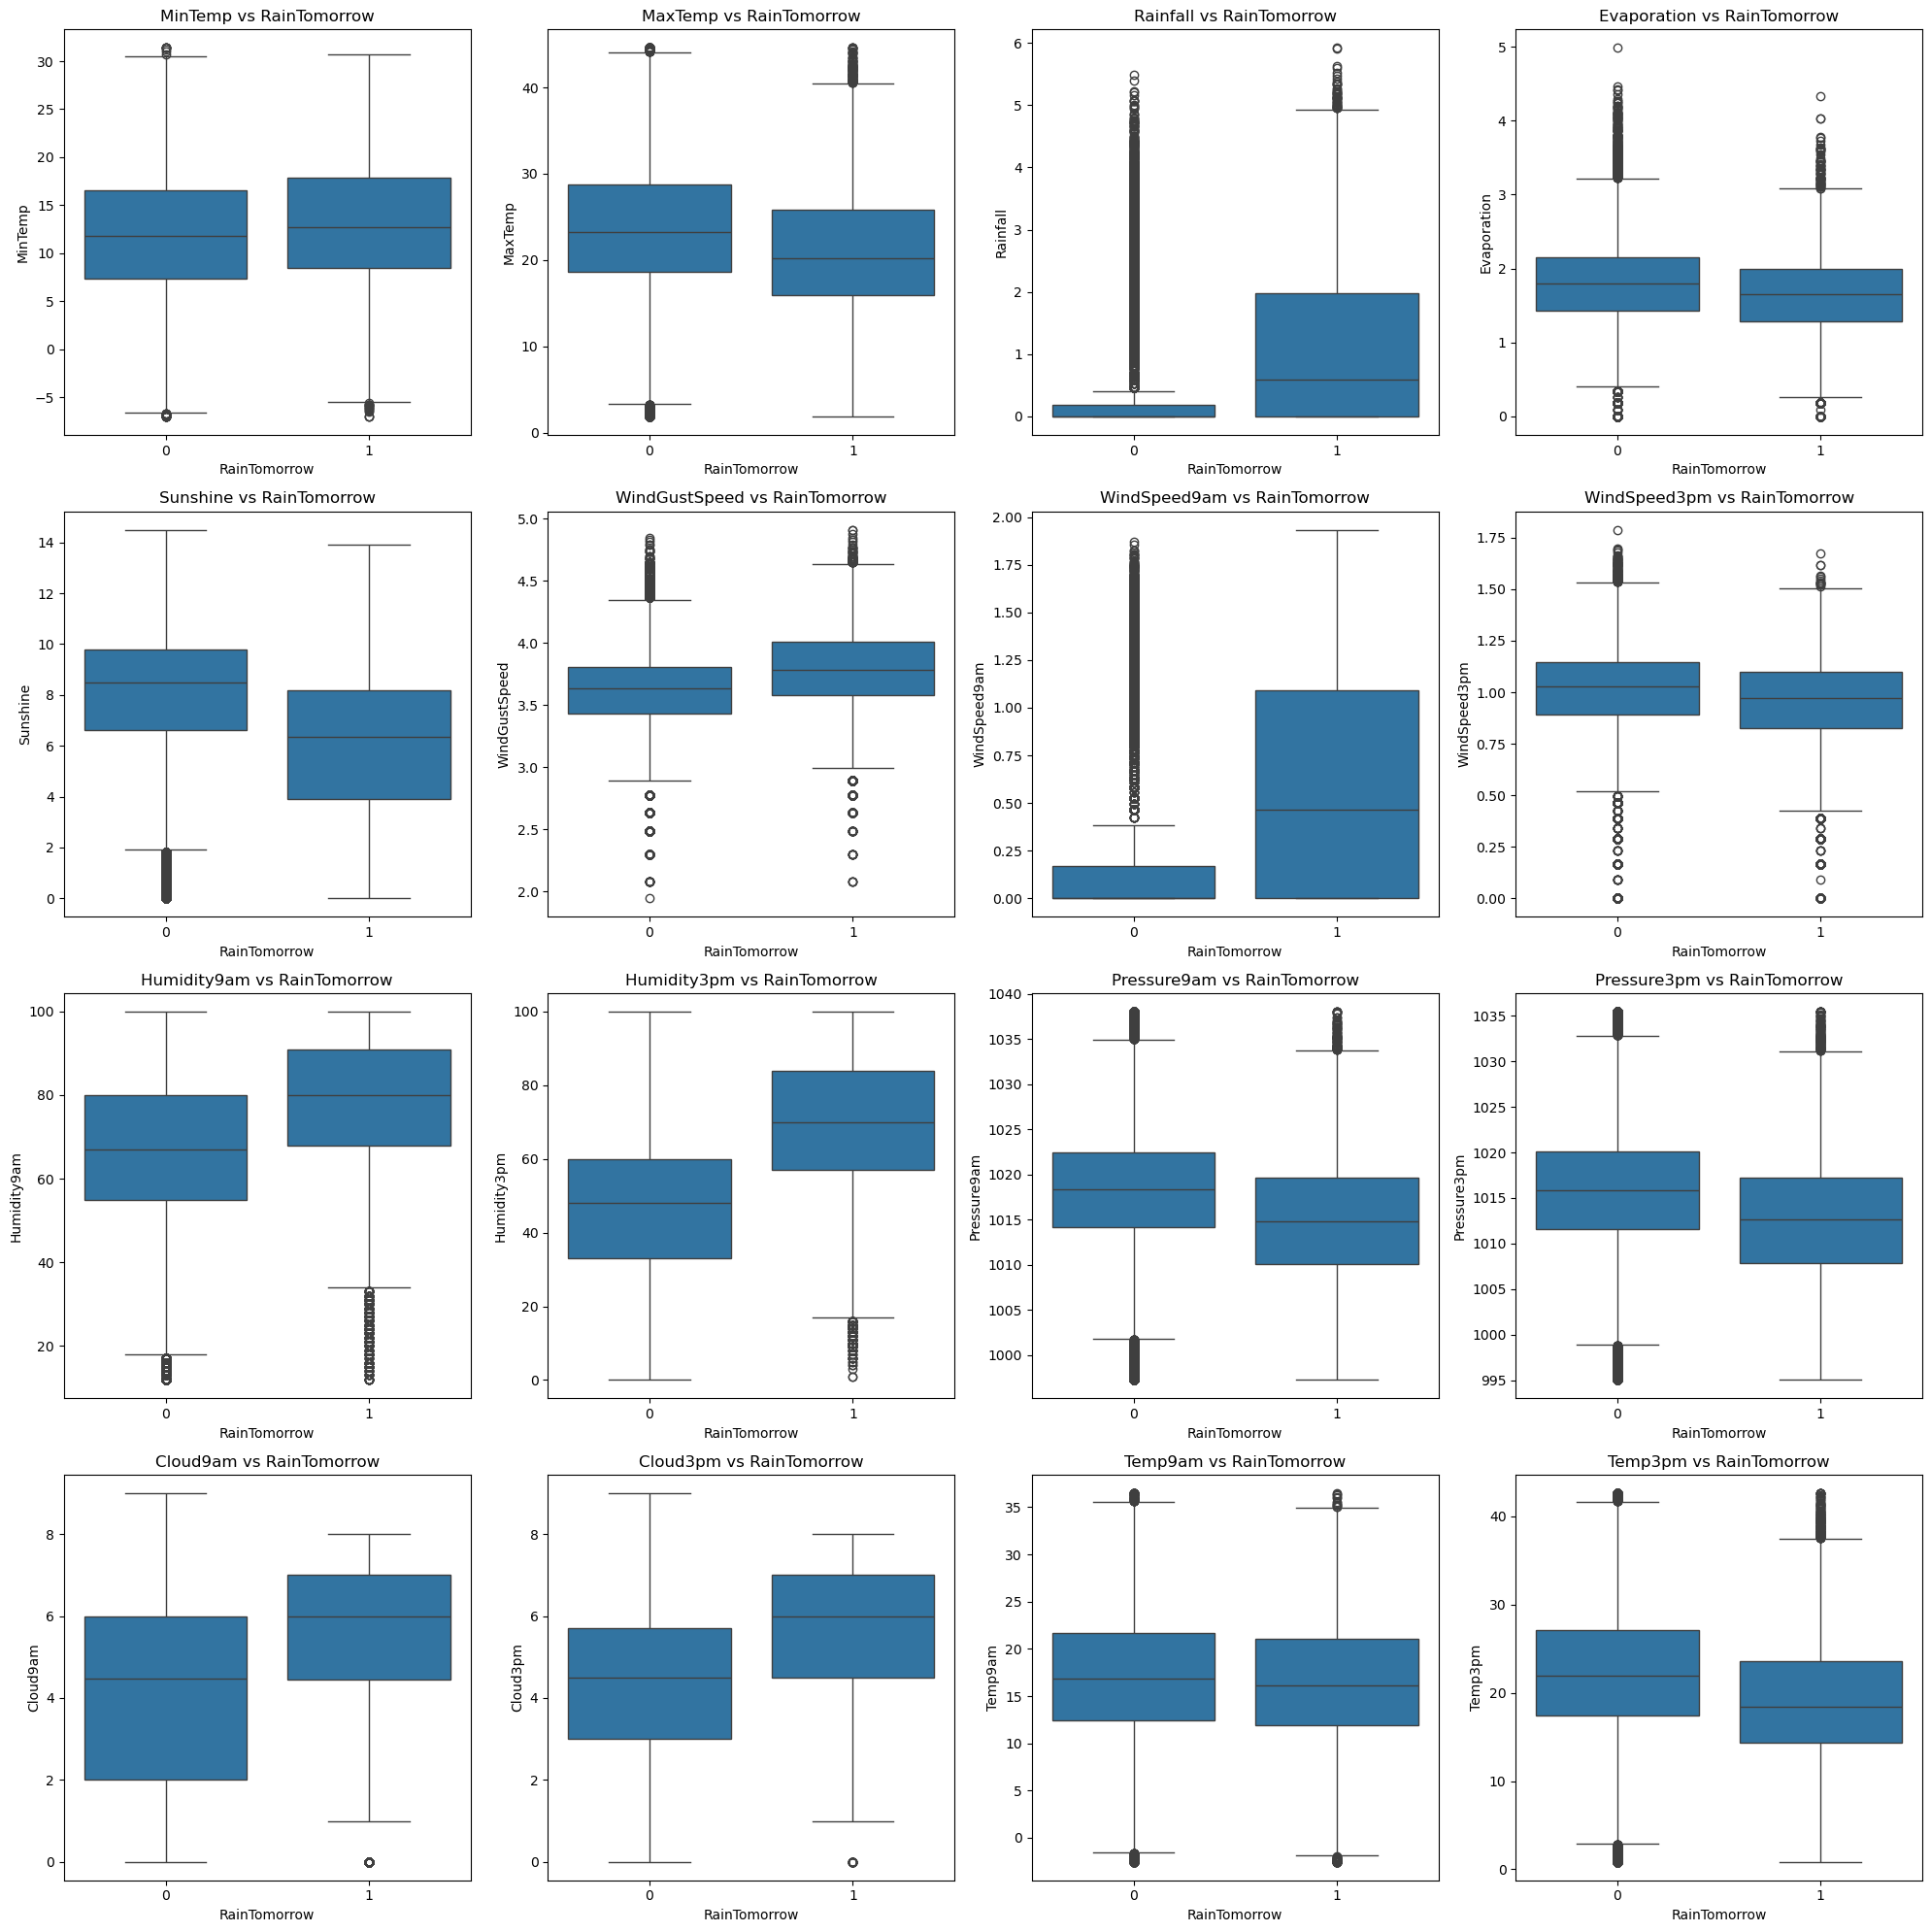

In [61]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                     'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
n_rows = 4
n_cols = 4

plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)  
    sns.boxplot(x='RainTomorrow', y=column, data=df)
    plt.title(f'{column} vs RainTomorrow')
    plt.xlabel('RainTomorrow')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

The correlation between some factors is probably very high. For example temperature:

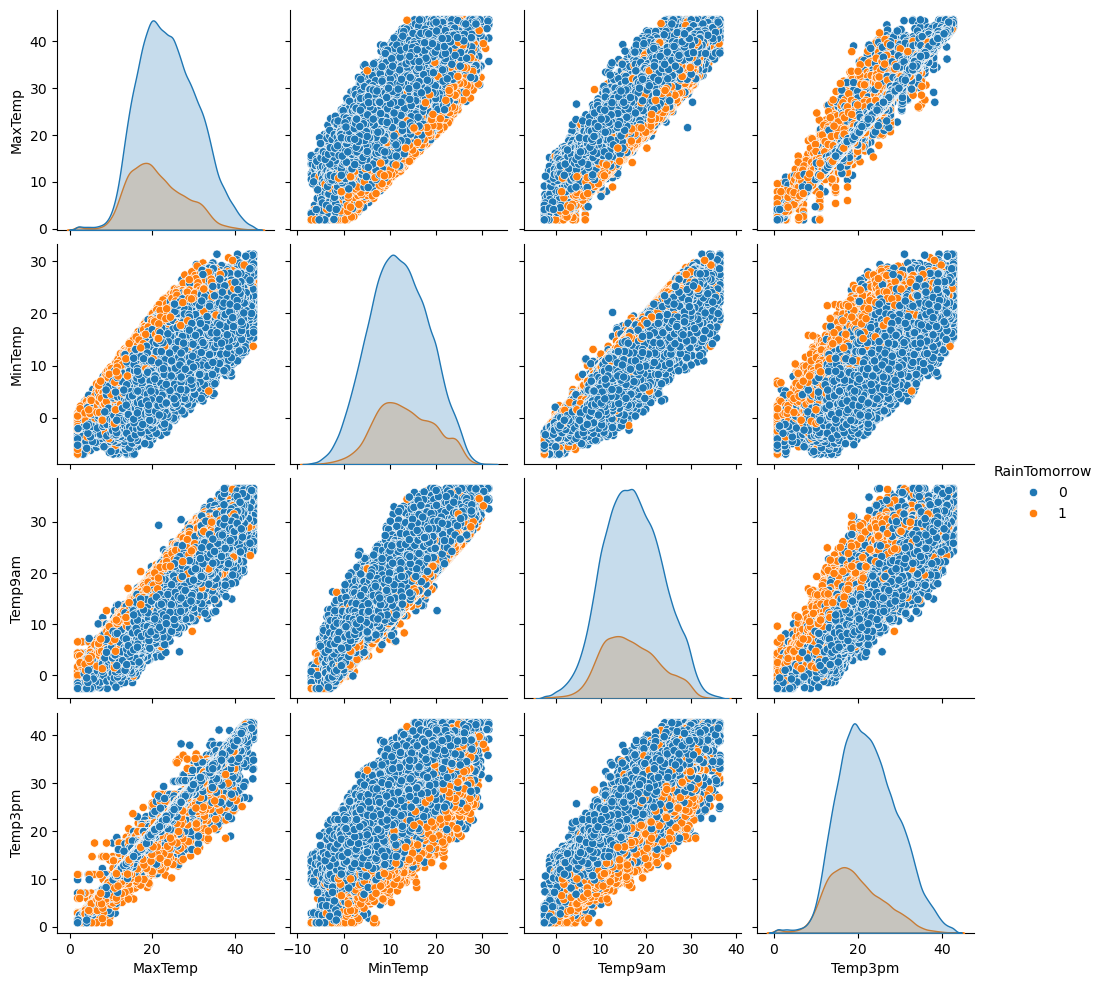

In [62]:
sns.pairplot(data=df, vars=('MaxTemp','MinTemp','Temp9am','Temp3pm'), hue='RainTomorrow')
plt.show()

And a very similar situation with pressure:

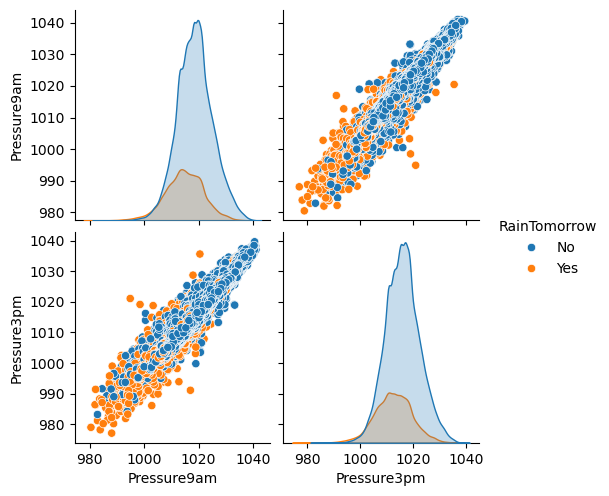

In [36]:
sns.pairplot(data=df, vars=('Pressure9am', 'Pressure3pm'), hue='RainTomorrow')
plt.show()

But for example the correlation is not so high for wind and humidity:

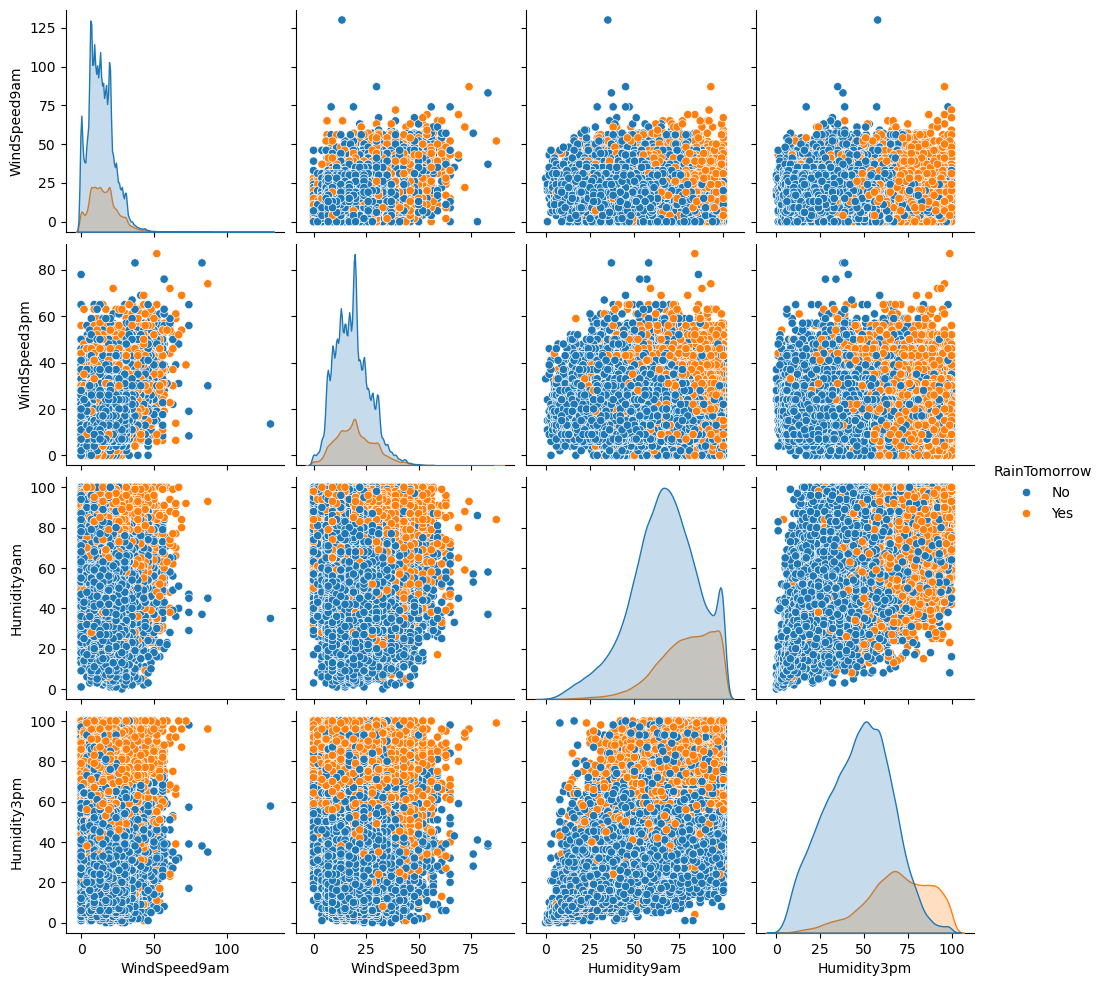

In [37]:
sns.pairplot(data=df, vars=('WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm'), hue='RainTomorrow')
plt.show()

Now we are sure that we should combine some columns - MaxTemp with Temp3pm, MinTemp with Temp9am, Pressure together
So maybe a mean? However, from the boxplots, we saw that later hours had a greater impact, so we will take them into account.

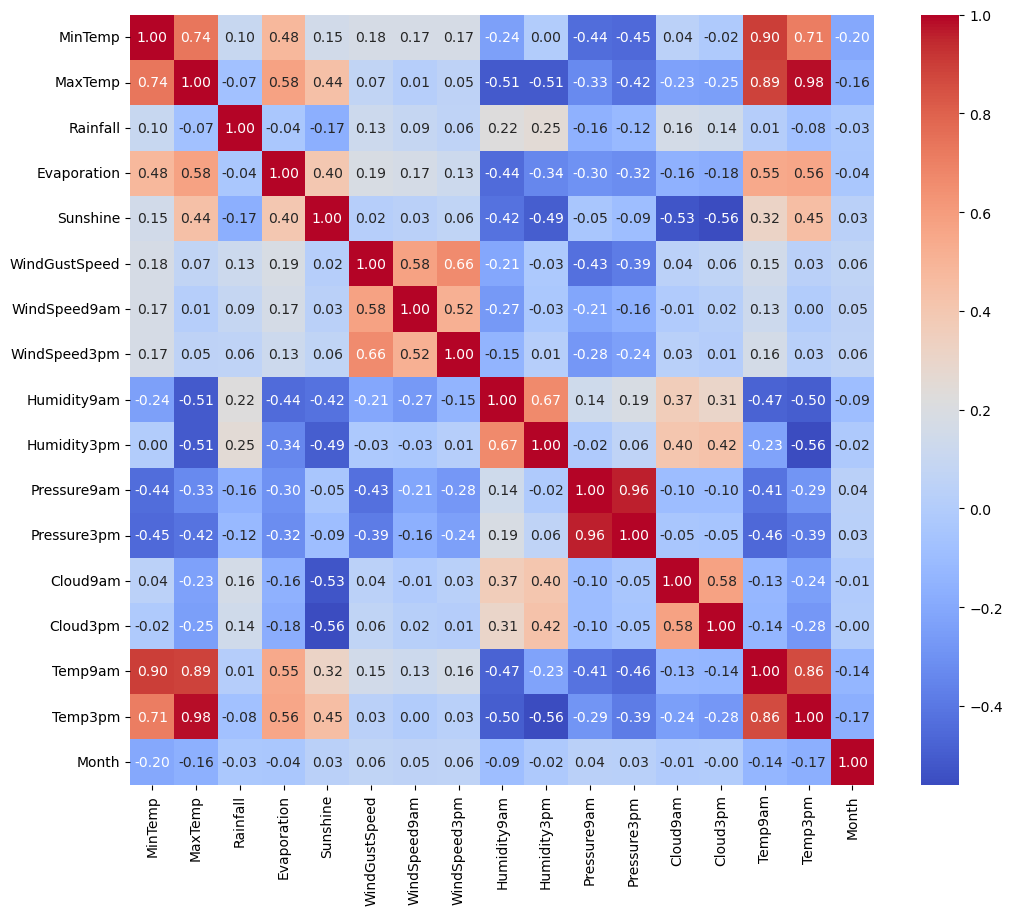

In [38]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()


We would also like to check what is the correlation of each parameter to TomorrowRain. To do that we have to change te type of some columns. 

In [42]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')

In [43]:
# Conversion of Rain columns to 0/1
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

num_cols = df.select_dtypes(include=['float64']).columns

# Correlation with "RainTomorrow"
correlation = df[num_cols].corrwith(df['RainTomorrow']).sort_values(ascending=False)

correlation


Humidity3pm      0.443761
WindSpeed9am     0.349537
Rainfall         0.343700
Cloud3pm         0.299736
Humidity9am      0.257632
Cloud9am         0.244314
WindGustSpeed    0.204014
MinTemp          0.083696
Temp9am         -0.027272
WindSpeed3pm    -0.108910
Evaporation     -0.112704
MaxTemp         -0.159286
Temp3pm         -0.191405
Pressure3pm     -0.213584
Pressure9am     -0.232638
Sunshine        -0.330387
dtype: float64

The deletion of these columns should help in predicting rain. 